In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.Loan_ID.value_counts(dropna=False)

LP002006    1
LP001109    1
LP002714    1
LP001673    1
LP002587    1
           ..
LP001945    1
LP001914    1
LP001097    1
LP002337    1
LP002619    1
Name: Loan_ID, Length: 614, dtype: int64

In [6]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

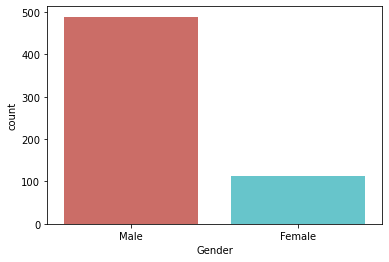

In [7]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [8]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


In [9]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

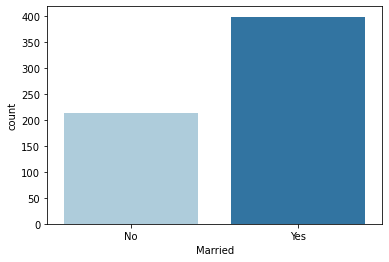

In [10]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

In [11]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))


Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


In [12]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

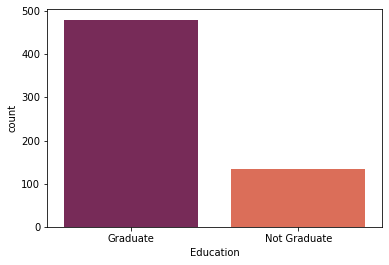

In [13]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [14]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


In [15]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

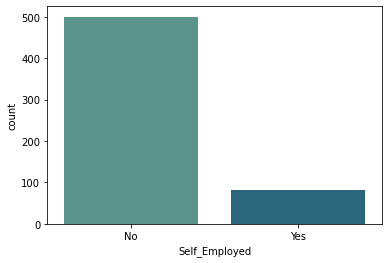

In [16]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()


In [17]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


In [18]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

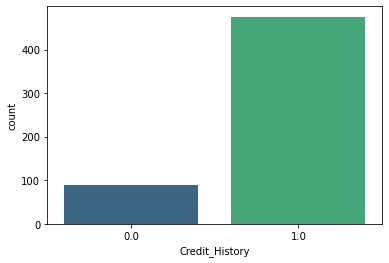

In [19]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [20]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


In [21]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

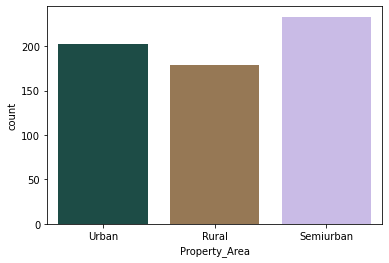

In [22]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [23]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


In [24]:
df.Loan_Status.value_counts(dropna=False)


Y    422
N    192
Name: Loan_Status, dtype: int64

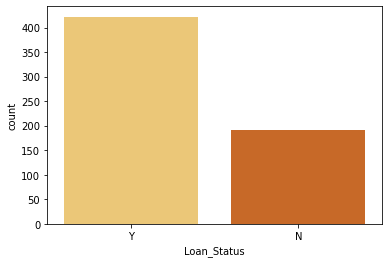

In [25]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [26]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


In [27]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

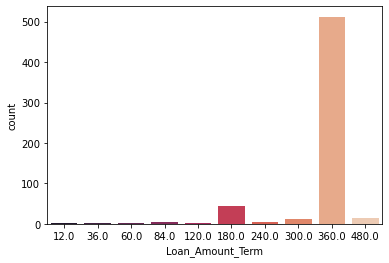

In [28]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [29]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))


Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


In [31]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

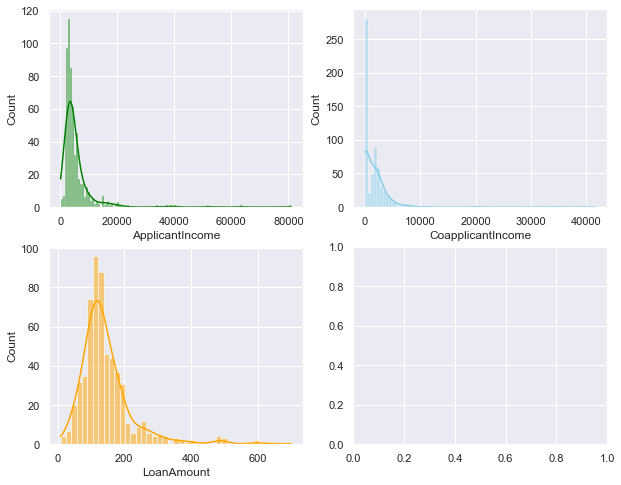

In [32]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

<AxesSubplot:>

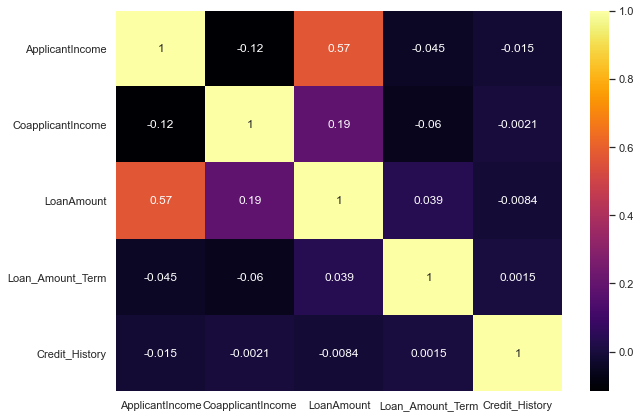

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno') 

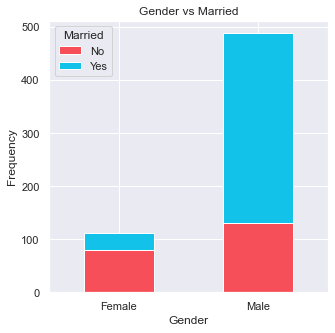

In [34]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

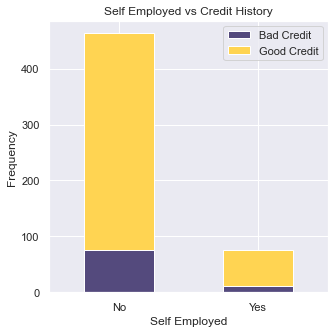

In [35]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

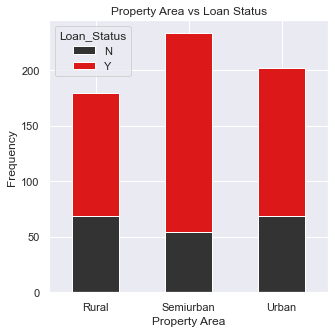

In [36]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

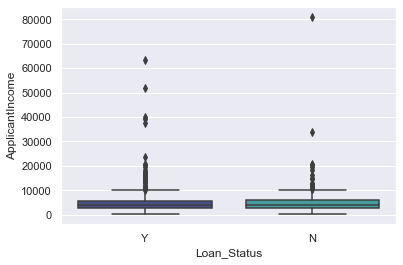

In [37]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

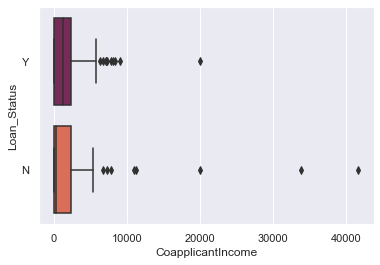

In [38]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket")

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

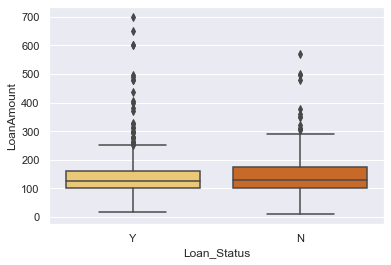

In [39]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr")

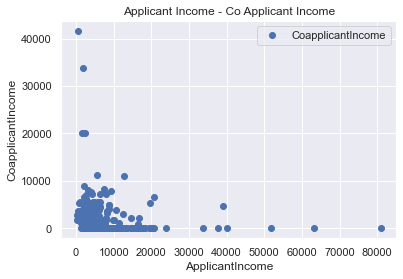

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915661, pvalue=1.4609839484240346e-40)


In [40]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

In [41]:
df = df.drop(['Loan_ID'], axis = 1)

In [42]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [43]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [44]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [45]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

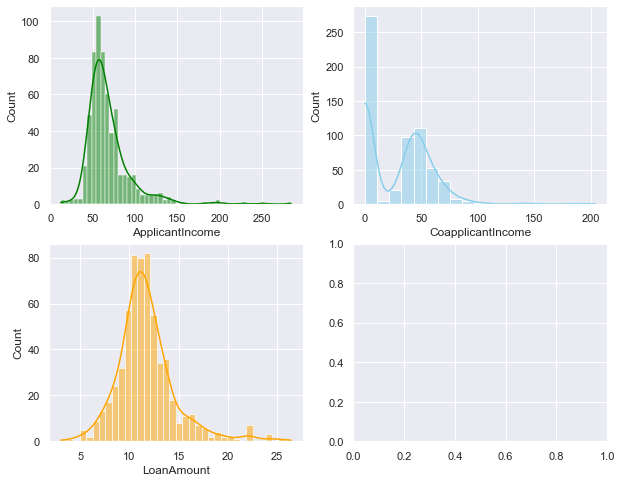

In [46]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

In [47]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [48]:
X, y = SMOTE().fit_resample(X, y)

NameError: name 'SMOTE' is not defined

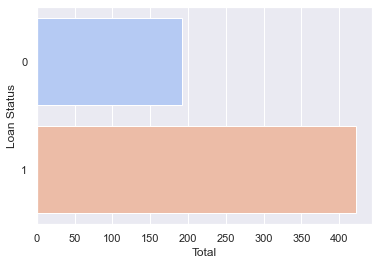

In [49]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [50]:
X = MinMaxScaler().fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8861788617886179

In [58]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100, n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8292682926829268

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8292682926829268

In [71]:
X

array([[0.23583451, 0.        , 0.38793922, ..., 0.        , 0.        ,
        1.        ],
       [0.20359418, 0.19024119, 0.3544156 , ..., 1.        , 0.        ,
        0.        ],
       [0.15613596, 0.        , 0.21843912, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.28490807, 0.07589436, 0.55018508, ..., 0.        , 0.        ,
        1.        ],
       [0.27476006, 0.        , 0.45506931, ..., 0.        , 0.        ,
        1.        ],
       [0.20359418, 0.        , 0.3637454 , ..., 0.        , 1.        ,
        0.        ]])

In [68]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: uint8

In [69]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,12.100089,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,67.697858,38.832976,11.313708,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,54.772256,0.000000,8.124038,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,50.823223,48.559242,10.954451,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
